In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
freeze_df = pd.read_csv('freezer_data.csv')
outlet_df = pd.read_csv('outlets_data.csv')
product_df = pd.read_csv('product_data.csv')
sales_df = pd.read_csv('sales_data.csv')
week_df = pd.read_csv('week_data.csv')

In [4]:
freeze_df.head(2)

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800


In [5]:
outlet_df.head(2)

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138


In [6]:
product_df.head(2)

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90


In [7]:
sales_df.head(5)

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0


In [8]:
week_df.head(2)

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023


## <span style="color:green;">Cluster Analysis</span>

In [9]:
# Import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def cluster(df):

    # scale the data
    sc = StandardScaler()
    df = sc.fit_transform(df)
    
    sse = []
    silhouette_array = []
    davies_bouldin_array = []
    calinski_harabasz_array = []
    # Fit KMeans algorithm for different values of k
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        silhouette_array.append(silhouette_score(df, kmeans.labels_))
        davies_bouldin_array.append(davies_bouldin_score(df, kmeans.labels_))
        calinski_harabasz_array.append(calinski_harabasz_score(df, kmeans.labels_))
    # Plot the SSE values against the number of clusters (k)
    # Define figure size and subplot layout
    plt.figure(figsize=(8,6))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Draw four subplots for different metrics
    plt.subplot(2, 2, 1)
    plt.plot(k_range, sse)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squared Errors (Inertia)")
    plt.title("Elbow Method")

    plt.subplot(2, 2, 2)
    plt.plot(k_range, silhouette_array)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score")

    plt.subplot(2, 2, 3)
    plt.plot(k_range, davies_bouldin_array)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Score")
    plt.title("Davies-Bouldin Score")

    plt.subplot(2, 2, 4)
    plt.plot(k_range, calinski_harabasz_array)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Calinski-Harabasz Score")
    plt.title("Calinski-Harabasz Score")

    plt.show()

In [10]:
# Perform KMeans clustering with optimal number of clusters
def plot_cluster(df, n):
    n_clusters = n
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    sc = StandardScaler()
    X = sc.fit_transform(df)
    y_kmeans = kmeans.fit_predict(X)
    colors = ['blue', 'green', 'red', 'purple', 'brown', 'orange', 'pink', 'gray', 'olive', 'cyan']
    # Visualize the clusters
    plt.figure(figsize=(5,4))
    for i in range(n_clusters):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label='Cluster '+str(i))
    # plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
    # plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
    # plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
    # plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='brown', label='Cluster 5')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters - ' + str(n))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [11]:
# Inertia = []
# silhouette_array = []
# davies_bouldin_array = []
# calinski_harabasz_array = []

## <span style="color:green;">EDA</span>

### Outlet

In [12]:
outlet_df.Outlet_ID.nunique()

951

### sales data

In [13]:
sales_df.shape

(81000, 5)

In [14]:
sales_df.Outlet_ID.nunique()

951

In [15]:
sales_df.week.value_counts().sort_index()

1     6746
2     6744
3     6729
4     6784
5     6699
6     6738
7     6766
8     6756
9     6716
10    6785
11    6769
12    6768
Name: week, dtype: int64

In [16]:
# Combining 

### Joining product df with sales

In [17]:
# taking outlet data as main dataframe
sales_and_product_df = pd.merge(sales_df, product_df.drop('product_name', axis=1), on='pid', how='left')
sales_and_product_df.head()

,Outlet_ID,week,pid,product_name,no_units,volume,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100


In [18]:
sales_and_product_df['week'] = 'Week_' + sales_and_product_df['week'].astype(str)

In [19]:
sales_and_product_df['total_volume'] = sales_and_product_df['no_units'] * sales_and_product_df['volume']

In [20]:
sales_and_product_df['total_amount'] = sales_and_product_df['no_units'] * sales_and_product_df['price']

In [21]:
sales_and_product_df.head(3)

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_amount
0,ID7203,Week_1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0
1,ID7203,Week_1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0
2,ID7203,Week_1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0


In [22]:
# sales_weekly1 = sales_and_product_df.pivot_table(index=['Outlet_ID'], columns='week', values='total_amount',
#                                                      aggfunc='sum', fill_value=0)

# sales_weekly1 = sales_weekly1.reset_index()
# sales_weekly1.to_csv('sales_weekly_amount.csv', index=False)

In [23]:
sales_weekly = sales_and_product_df.pivot_table(index=['Outlet_ID'], columns='week', values='total_volume',
                                                     aggfunc='sum', fill_value=0)

sales_weekly = sales_weekly.reset_index()

In [24]:
sales_weekly.head()

week,Outlet_ID,Week_1,Week_10,Week_11,Week_12,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
0,ID1008,798.0,500.4,575.0,658.0,658.6,718.0,538.2,304.4,401.4,446.8,503.6,498.0
1,ID1012,197.0,301.0,234.0,238.0,356.0,208.0,292.0,285.0,286.0,298.0,319.0,261.0
2,ID1024,526.0,744.0,603.0,627.0,602.0,486.0,574.0,592.0,221.0,831.0,640.0,497.0
3,ID1029,1676.2,1394.6,1634.6,1046.4,1370.4,1520.6,1297.8,1088.0,1577.0,1058.2,1371.6,1482.6
4,ID1036,603.8,828.8,860.8,519.6,875.8,852.4,907.6,623.8,680.0,458.4,672.8,917.8


In [25]:
sales_weekly.Outlet_ID.nunique()

951

In [26]:
# sales_and_product_pivot.to_csv('weekly_capacity_per_week.csv', index=False)

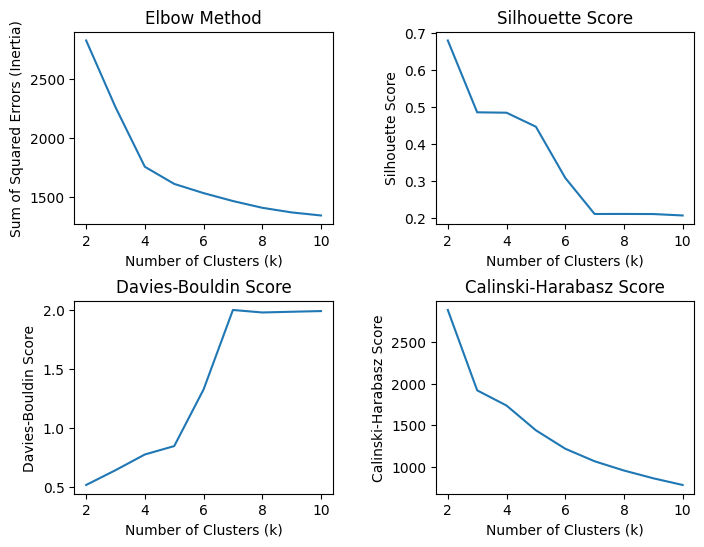

In [27]:
cluster(sales_weekly.iloc[:,1:])

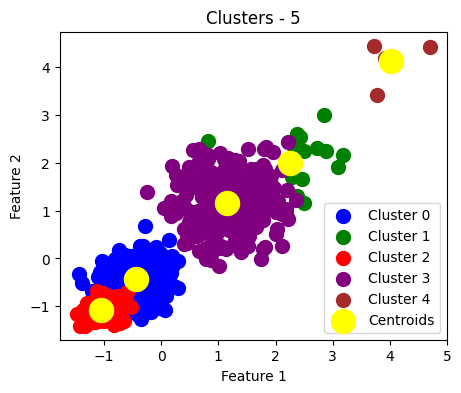

In [28]:
plot_cluster(sales_weekly.iloc[:,1:], 5)

### Add more columns to sales_weekly

In [29]:
# # Create pivot table with prefix
# pivot = pd.pivot_table(df, index='Label', aggfunc={'Value1': 'sum', 'Value2': 'mean'}, 
#                        columns=['Value1', 'Value2'], fill_value=0, prefix='Column_')

In [30]:
sales_product = sales_and_product_df.pivot_table(index=['Outlet_ID'], columns='product_name', values='total_volume',
                                                     aggfunc='sum', fill_value=0)

sales_product = sales_product.reset_index()
sales_product.head()

product_name,Outlet_ID,Butter Pecan Small Stick,Chocolate Fudge Big Scoop,Chocolate Petite Bar,Cookies and Cream Mega Tub,Mint Bite-size Pop,Mint Chocolate Chip Family Pack,Moose Tracks Jumbo Cup,Rocky Road Mega Tub,Strawberry Tiny Cup,Vanilla Mini Cone
0,ID1008,1211.0,0,1441.2,0,1297.2,0,0,0,1257.0,1394.0
1,ID1012,0.0,636,0.0,559,0.0,795,713,572,0.0,0.0
2,ID1024,0.0,1703,0.0,1451,0.0,1150,1251,1388,0.0,0.0
3,ID1029,1383.6,1659,1515.4,1109,1592.2,1891,2190,1513,1831.6,1833.2
4,ID1036,1167.0,567,1141.6,722,1105.2,725,583,564,1240.0,986.8


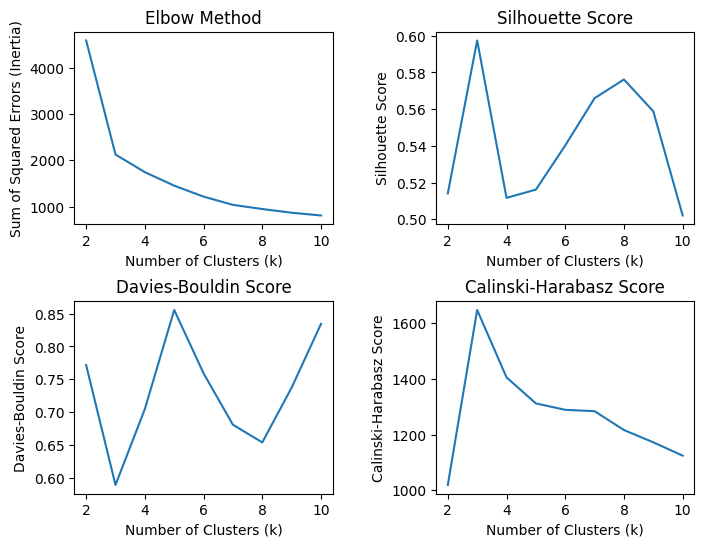

In [31]:
cluster(sales_product.iloc[:,1:])

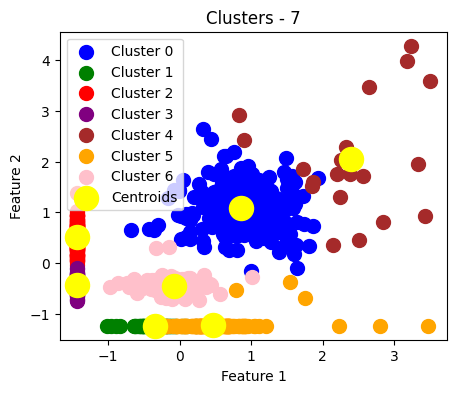

In [32]:
plot_cluster(sales_product.iloc[:,1:], 7)

In [33]:
sales_and_product_df.head()

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_amount
0,ID7203,Week_1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0
1,ID7203,Week_1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0
2,ID7203,Week_1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0
3,ID7203,Week_1,IP4,Mint Bite-size Pop,502.0,0.2,100,100.4,50200.0
4,ID7203,Week_1,IP5,Butter Pecan Small Stick,710.0,0.2,100,142.0,71000.0


In [34]:
sales_shop_total = sales_and_product_df.groupby(['Outlet_ID'])['total_amount', 'total_volume'].sum().reset_index()
sales_shop_total.head()

,Outlet_ID,total_amount,total_volume
0,ID1008,3290990.0,6600.4
1,ID1012,3648650.0,3275.0
2,ID1024,7726300.0,6943.0
3,ID1029,13401160.0,16518.0
4,ID1036,6338870.0,8801.6


In [35]:
# Merge the dataframes
merged_df = pd.merge(outlet_df, sales_weekly, on='Outlet_ID', how='left')
merged_df = pd.merge(merged_df, sales_product, on='Outlet_ID', how='left')
merged_df = pd.merge(merged_df, sales_shop_total, on='Outlet_ID', how='left')
merged_df.head()

,Outlet_ID,area(sqft),Week_1,Week_10,Week_11,Week_12,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Butter Pecan Small Stick,Chocolate Fudge Big Scoop,Chocolate Petite Bar,Cookies and Cream Mega Tub,Mint Bite-size Pop,Mint Chocolate Chip Family Pack,Moose Tracks Jumbo Cup,Rocky Road Mega Tub,Strawberry Tiny Cup,Vanilla Mini Cone,total_amount,total_volume
0,ID7203,5660,677.8,496.8,876.4,446.6,480.4,561.0,516.6,560.4,645.4,598.4,627.6,461.8,1288.6,0,1459.0,0,1104.0,0,0,0,1825.4,1272.2,3492920.0,6949.2
1,ID1878,4138,519.4,792.2,442.0,493.8,409.6,561.8,744.8,642.6,662.6,576.6,700.2,662.4,1349.6,0,1324.4,0,1590.8,0,0,0,1371.2,1572.0,3606340.0,7208.0
2,ID1740,5546,748.4,616.2,738.6,613.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,414.4,1363.4,0,1623.2,0,1438.4,0,0,0,1567.4,1525.0,3755910.0,7517.4
3,ID4366,5134,682.0,995.0,485.2,715.8,614.4,768.6,807.2,465.6,490.8,636.2,605.0,795.0,1904.8,0,1251.8,0,1751.8,0,0,0,1846.4,1306.0,4060130.0,8060.8
4,ID8358,4100,578.2,566.2,467.6,814.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,747.6,1773.2,0,1912.4,0,1248.2,0,0,0,1530.4,1411.4,3918700.0,7875.6


In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["figure.autolayout"] = True

# Perform dimensionality reduction using PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(merged_df.iloc[:,1:])

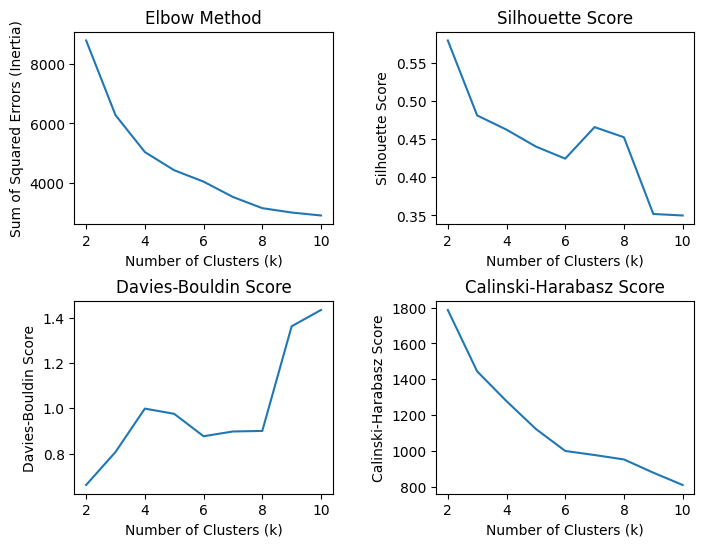

In [37]:
cluster(merged_df.iloc[:,1:])

## <span style="color:green;">PCA</span>

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["figure.autolayout"] = True

# Perform dimensionality reduction using PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(merged_df.iloc[:,1:])

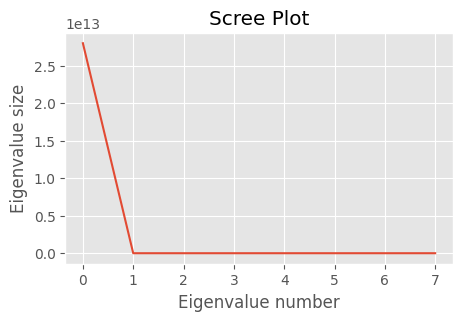

In [41]:
%matplotlib inline
plt.figure(figsize=(5,3))
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_)
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.show()

In [42]:
number_of_selected_features = 1
pca_features = X_pca[:,:number_of_selected_features]

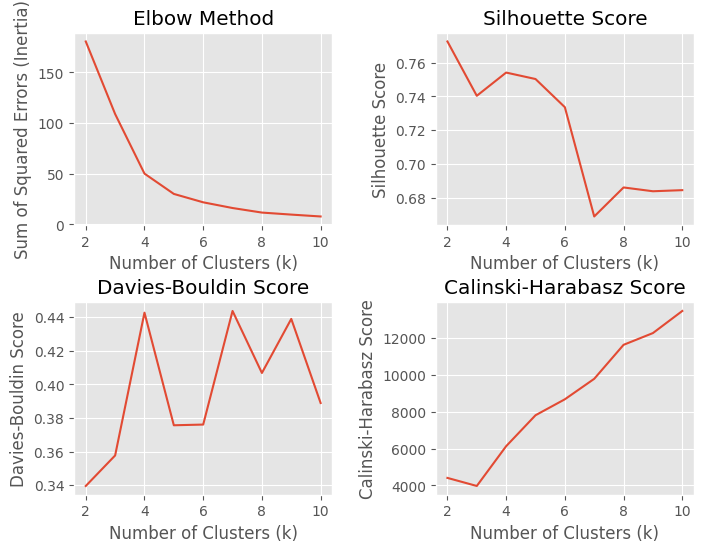

In [43]:
cluster(pca_features)

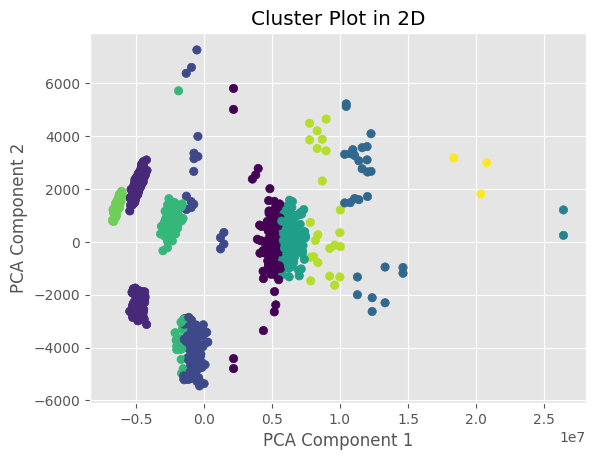

<IPython.core.display.Javascript object>


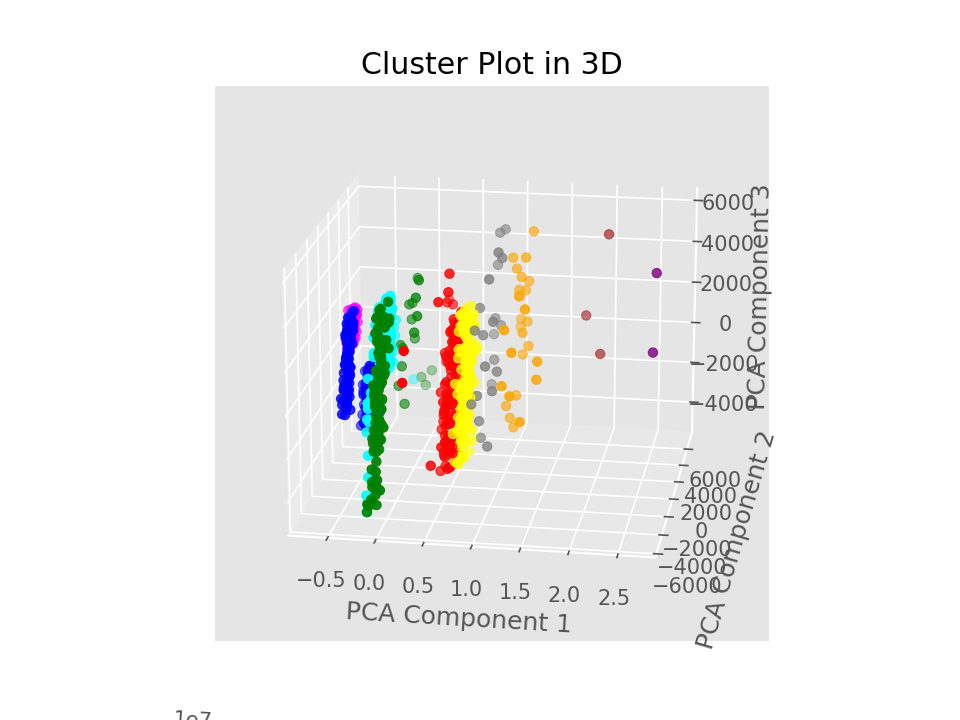

In [44]:
# Cluster the reduced data using KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_pca)
k_predicions = kmeans.predict(X_pca)
labels = kmeans.labels_

%matplotlib inline
# Plot the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Plot in 2D')
plt.show()
%matplotlib notebook
# Plot the clusters in 3D
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=[colors[i] for i in labels])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Cluster Plot in 3D')

plt.show()

In [45]:
merged_df.head()

,Outlet_ID,area(sqft),Week_1,Week_10,Week_11,Week_12,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Butter Pecan Small Stick,Chocolate Fudge Big Scoop,Chocolate Petite Bar,Cookies and Cream Mega Tub,Mint Bite-size Pop,Mint Chocolate Chip Family Pack,Moose Tracks Jumbo Cup,Rocky Road Mega Tub,Strawberry Tiny Cup,Vanilla Mini Cone,total_amount,total_volume
0,ID7203,5660,677.8,496.8,876.4,446.6,480.4,561.0,516.6,560.4,645.4,598.4,627.6,461.8,1288.6,0,1459.0,0,1104.0,0,0,0,1825.4,1272.2,3492920.0,6949.2
1,ID1878,4138,519.4,792.2,442.0,493.8,409.6,561.8,744.8,642.6,662.6,576.6,700.2,662.4,1349.6,0,1324.4,0,1590.8,0,0,0,1371.2,1572.0,3606340.0,7208.0
2,ID1740,5546,748.4,616.2,738.6,613.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,414.4,1363.4,0,1623.2,0,1438.4,0,0,0,1567.4,1525.0,3755910.0,7517.4
3,ID4366,5134,682.0,995.0,485.2,715.8,614.4,768.6,807.2,465.6,490.8,636.2,605.0,795.0,1904.8,0,1251.8,0,1751.8,0,0,0,1846.4,1306.0,4060130.0,8060.8
4,ID8358,4100,578.2,566.2,467.6,814.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,747.6,1773.2,0,1912.4,0,1248.2,0,0,0,1530.4,1411.4,3918700.0,7875.6


In [46]:
df_for_score_cal = merged_df.loc[:,['Outlet_ID', 'total_amount', 'total_volume']].copy()
df_for_score_cal['kmeans_cluster'] = k_predicions
df_for_score_cal.head()

,Outlet_ID,total_amount,total_volume,kmeans_cluster
0,ID7203,3492920.0,6949.2,1
1,ID1878,3606340.0,7208.0,1
2,ID1740,3755910.0,7517.4,1
3,ID4366,4060130.0,8060.8,1
4,ID8358,3918700.0,7875.6,1


In [47]:
df_for_score_cal.kmeans_cluster.value_counts()

1    260
6    197
5    146
0    132
2    127
7     70
3     28
8     23
9      3
4      2
Name: kmeans_cluster, dtype: int64

In [48]:
freeze_df

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [49]:
freezer_list = freeze_df['Freezer Name'].values.tolist()
freezer_list

['ChillMaster',
 'FreezeZone',
 'CoolTech',
 'mini CoolTech',
 'IceBlast Pro',
 'IceBlast',
 'FreezeTech ',
 'FreezeTech 3.0',
 'ChillTech',
 'IceTech']

In [56]:
import itertools
import random

freezer_list = ['ChillMaster', 'FreezeZone', 'CoolTech', 'mini CoolTech', 'IceBlast Pro', 'IceBlast', 'FreezeTech ', 'FreezeTech 3.0', 'ChillTech', 'IceTech']

perms = itertools.permutations(freezer_list)

# Convert perms to a list
perms_list = list(perms)

# Select a random subset of size 5 from the permutations
random.seed(42)
subset_perm = random.sample(perms_list, k=100_000)

In [57]:
import itertools
# list of cluster labels
cluster_list = list(range(n_clusters))
print('n_clusters: ', n_clusters)
print(cluster_list)
print('subset of perm count: ', len(subset_perm))
print('item_count: ', freezer_list)
# Get all possible permutations of the list

roi_list = []
isr_list = []
perm_list = []
# Iterate over the permutations and assign to variables
for i, perm in enumerate(subset_perm):
    # Assign each value in the permutation to a variable
    if i%10000 == 0:
        print(i)
    cluster_list = list(range(n_clusters))
    replace_dict = dict(zip(cluster_list, perm))

    dfs = df_for_score_cal.copy()
    dfs['kmeans_cluster'] = dfs.kmeans_cluster.replace(replace_dict)
    # join the dataframes on the 'key' column in df1 and 'key2' column in df2
    dfs = pd.merge(dfs, freeze_df, left_on='kmeans_cluster', right_on='Freezer Name', how='left')
    dfs['ROI'] = dfs['total_amount'] / dfs['Power and maitainance Cost (LKR) per 100 hours']
    dfs['Item_Sales_Ratio'] = dfs['total_volume'] / dfs['Volume Capacity (Liters)']
    
    roi_list.append(dfs['ROI'].sum())
    isr_list.append(dfs['Item_Sales_Ratio'].sum())
    perm_list.append(perm)
      

n_clusters:  10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
subset of perm count:  100000
item_count:  ['ChillMaster', 'FreezeZone', 'CoolTech', 'mini CoolTech', 'IceBlast Pro', 'IceBlast', 'FreezeTech ', 'FreezeTech 3.0', 'ChillTech', 'IceTech']
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [62]:
df_for_score_cal.head()

,Outlet_ID,total_amount,total_volume,kmeans_cluster
0,ID7203,3492920.0,6949.2,1
1,ID1878,3606340.0,7208.0,1
2,ID1740,3755910.0,7517.4,1
3,ID4366,4060130.0,8060.8,1
4,ID8358,3918700.0,7875.6,1


In [74]:
score_df = pd.DataFrame()
score_df['ROI'] = roi_list
score_df['ISR'] = isr_list

In [75]:
score_df.head()

,ROI,ISR
0,3.464097e+06,210528.809453
1,3.125214e+06,166559.018437
2,3.014906e+06,161568.257175
3,2.887815e+06,131036.805441
4,3.489413e+06,209877.103152


In [76]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
score_df[score_df.columns] = mms.fit_transform(score_df)

In [77]:
score_df.describe()

,ROI,ISR
count,100000.000000,100000.000000
mean,0.462562,0.453142
std,0.188518,0.191777
min,0.000000,0.000000
25%,0.318126,0.303375
50%,0.451878,0.443876
75%,0.598009,0.589695
max,1.000000,1.000000


In [78]:
score_df['comb_metric'] = (score_df['ROI']*score_df['ISR']) #/ (score_df['ROI']+score_df['ISR'])

In [81]:
score_df['comb_metric'].max()

0.9992216273270198

In [89]:
score_df.head()

,ROI,ISR,comb_metric
0,0.688187,0.702583,0.483509
1,0.444688,0.430312,0.191355
2,0.365429,0.399408,0.145955
3,0.274109,0.210349,0.057659
4,0.706378,0.698548,0.493439


In [86]:
score_df.sort_values(by=['comb_metric'], ascending=False).head()

,ROI,ISR,comb_metric
52467,0.999222,1.000000,0.999222
76196,0.995126,0.998950,0.994081
24260,0.999597,0.992144,0.991744
1406,1.000000,0.988803,0.988803
1147,0.993048,0.993686,0.986778


## <span style="color:green;">Validating Freezer Allocation </span>

In [88]:
max_score_index = score_df.sort_values(by=['comb_metric'], ascending=False).index[0]
max_score_index

52467

In [91]:
optimized_freezer_list = perm_list[max_score_index]
optimized_freezer_list

('mini CoolTech',
 'IceBlast',
 'ChillTech',
 'FreezeZone',
 'IceTech',
 'FreezeTech 3.0',
 'ChillMaster',
 'FreezeTech ',
 'CoolTech',
 'IceBlast Pro')

In [97]:
optimized_replace_dict = dict(zip(cluster_list, list(optimized_freezer_list)))
optimized_replace_dict

{0: 'mini CoolTech',
 1: 'IceBlast',
 2: 'ChillTech',
 3: 'FreezeZone',
 4: 'IceTech',
 5: 'FreezeTech 3.0',
 6: 'ChillMaster',
 7: 'FreezeTech ',
 8: 'CoolTech',
 9: 'IceBlast Pro'}

In [94]:
df_for_score_cal.head(3)

,Outlet_ID,total_amount,total_volume,kmeans_cluster
0,ID7203,3492920.0,6949.2,1
1,ID1878,3606340.0,7208.0,1
2,ID1740,3755910.0,7517.4,1


In [98]:
stores_with_optimal_freezer_df = df_for_score_cal.copy()
stores_with_optimal_freezer_df['kmeans_cluster'] = stores_with_optimal_freezer_df['kmeans_cluster'].replace(optimized_replace_dict)

In [102]:
stores_with_optimal_freezer_df = stores_with_optimal_freezer_df.rename(columns={'kmeans_cluster': 'Freezer_Name'})
stores_with_optimal_freezer_df.head()

,Outlet_ID,total_amount,total_volume,Freezer_Name
0,ID7203,3492920.0,6949.2,IceBlast
1,ID1878,3606340.0,7208.0,IceBlast
2,ID1740,3755910.0,7517.4,IceBlast
3,ID4366,4060130.0,8060.8,IceBlast
4,ID8358,3918700.0,7875.6,IceBlast


In [ ]:
stores_with_optimal_freezer_df['Freezer_Name'].values_count()

<IPython.core.display.Javascript object>


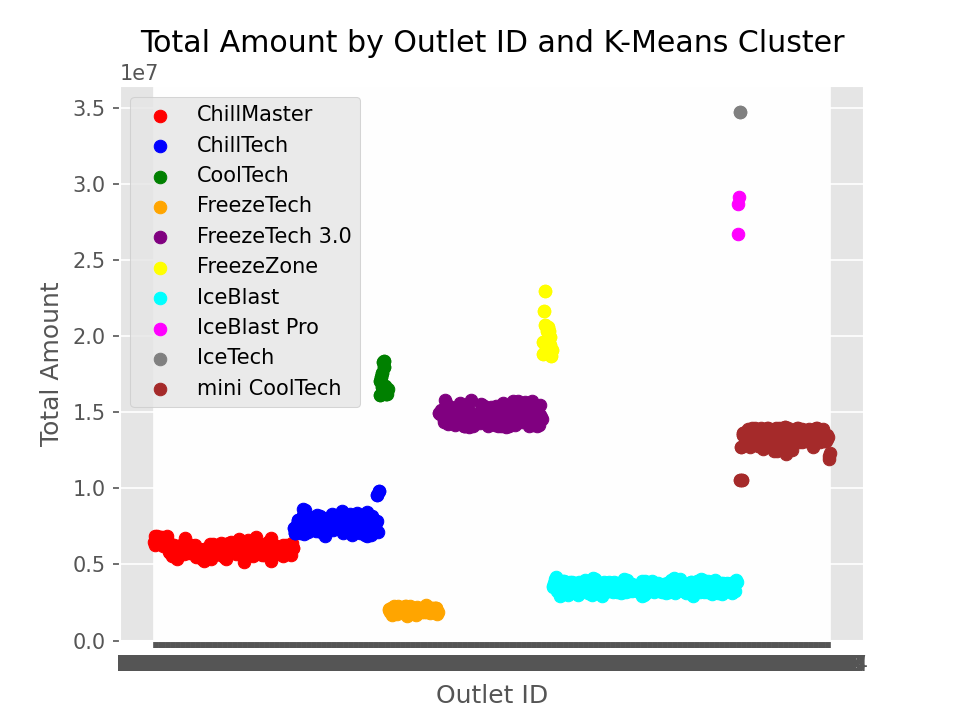

In [109]:
import matplotlib.pyplot as plt

# Define a dictionary to map category names to colors

# Create a scatter plot with different colors for different categories
fig, ax = plt.subplots()
c=0
for category, group in stores_with_optimal_freezer_df.groupby('Freezer_Name'):
    ax.scatter(group['Outlet_ID'], group['total_amount'], color=colors[c], label=category)
    c=c+1
ax.set_xlabel('Outlet ID')
ax.set_ylabel('Total Amount')
ax.set_title('Total Amount by Outlet ID and K-Means Cluster')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


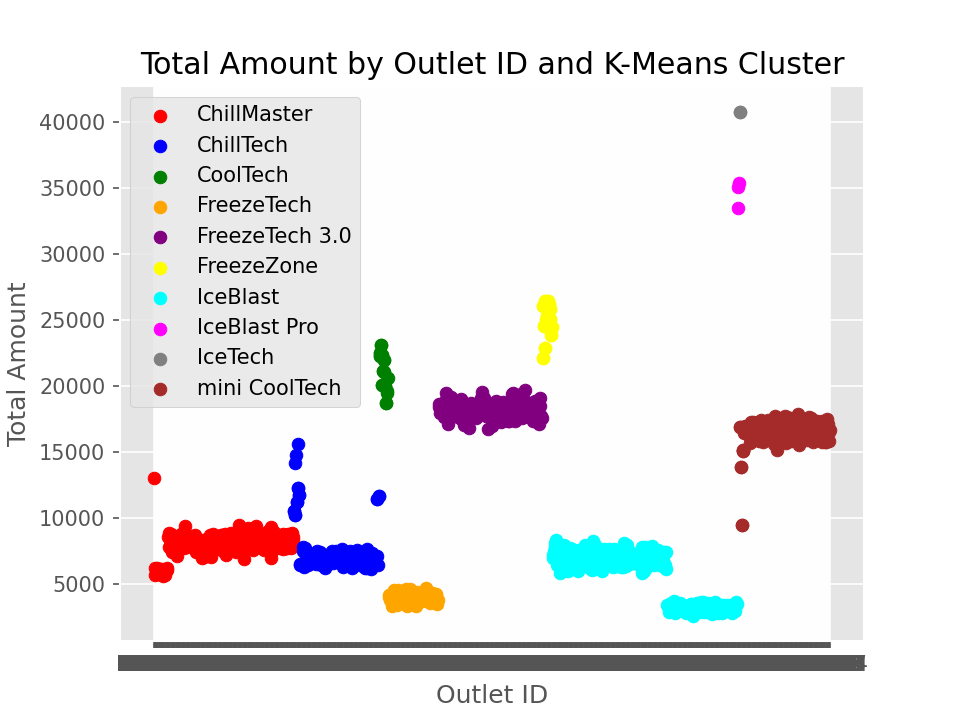

In [111]:
# Define a dictionary to map category names to colors

# Create a scatter plot with different colors for different categories
fig, ax = plt.subplots()
c=0
for category, group in stores_with_optimal_freezer_df.groupby('Freezer_Name'):
    ax.scatter(group['Outlet_ID'], group['total_volume'], color=colors[c], label=category)
    c=c+1
ax.set_xlabel('Outlet ID')
ax.set_ylabel('Total Amount')
ax.set_title('Total Amount by Outlet ID and K-Means Cluster')
ax.legend()

plt.show()